# Machine Learning with Python
# Part 1. Supervised Learning - Regression

Author: Kang P. Lee<br>
References:
- Documentation scikit-learn (http://scikit-learn.org/stable/documentation.html)
- Introduction to Machine Learning with Python (http://shop.oreilly.com/product/0636920030515.do)
- Major League Baseball data form SeanLahman.com (http://www.seanlahman.com/baseball-archive/statistics/)
- Baseball statistics (https://en.wikipedia.org/wiki/Baseball_statistics)

## Set the Goal

Let's aim to build a machine learning model from the Major League Baseball dataset that is able to predict the number of homeruns (HRs) a batter would hit in a single season using some statistics such as the number of games (G), the number of at bats (AB), runs scored (R), batting average (BA) and slugging average (SLG). 

For example, a promising rookie is expected to play in a new season at about 130 games and 450 bats, to score about 100 runs and to have a batting average of around 0.3 and a slugging average of around 0.6. How many home runs will he probably be able to hit this season?

## Import Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the Dataset into a Pandas Dataframe

In [2]:
df = pd.read_csv("Batting.csv")

It's a very good idea to start a machine learning task by loading the dataset into a Pandas dataframe as it provides a wide range of data manipulation functionalities. 

## Say Hello to the Dataset

In [3]:
df.shape

(102816, 22)

It says <i>df</i> is a 102,816 x 22 matrix, which means it has 102,816 rows and 22 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 22 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.3+ MB


In [5]:
df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
102811,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
102812,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0
102813,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0
102814,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0
102815,zychto01,2016,1,SEA,AL,12,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


It's always a good idea to check the first and last <i>k</i> records to get an idea of what the dataset looks like. The more data you look at, the better understanding of your data you have.

## Filter Out Unnecessary Data

In [7]:
df2k = df[df.yearID >= 2000]

It'd be helpful to filter out some old data that was created before the year 2000, so we can concentrate on the latest records. 

In [8]:
df2k.shape

(23566, 22)

In [9]:
df2k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23566 entries, 79250 to 102815
Data columns (total 22 columns):
playerID    23566 non-null object
yearID      23566 non-null int64
stint       23566 non-null int64
teamID      23566 non-null object
lgID        23566 non-null object
G           23566 non-null int64
AB          23566 non-null int64
R           23566 non-null int64
H           23566 non-null int64
2B          23566 non-null int64
3B          23566 non-null int64
HR          23566 non-null int64
RBI         23566 non-null float64
SB          23566 non-null float64
CS          23566 non-null float64
BB          23566 non-null int64
SO          23566 non-null float64
IBB         23566 non-null float64
HBP         23566 non-null float64
SH          23566 non-null float64
SF          23566 non-null float64
GIDP        23566 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 4.1+ MB


Now we no longer have any null values, which is very good for maching learning. 

In [10]:
df2k.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
79250,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0
79251,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,12.0,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0
79252,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0
79253,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,79.0,28.0,8.0,100,116.0,9.0,1.0,0.0,3.0,12.0
79254,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df2k.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
102811,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
102812,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0
102813,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0
102814,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0
102815,zychto01,2016,1,SEA,AL,12,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Inspect the Dataset

In [12]:
df2k[["AB", "H", "2B", "3B", "HR", "BB", "SO"]].describe()

,AB,H,2B,3B,HR,BB,SO
count,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000
mean,119.929560,31.293686,6.242341,0.652211,3.632903,11.279640,24.380251
std,180.555737,50.417435,10.482481,1.574536,7.478389,19.996644,36.001763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000
75%,176.750000,43.000000,8.000000,1.000000,3.000000,14.000000,36.000000
max,716.000000,262.000000,59.000000,23.000000,73.000000,232.000000,223.000000


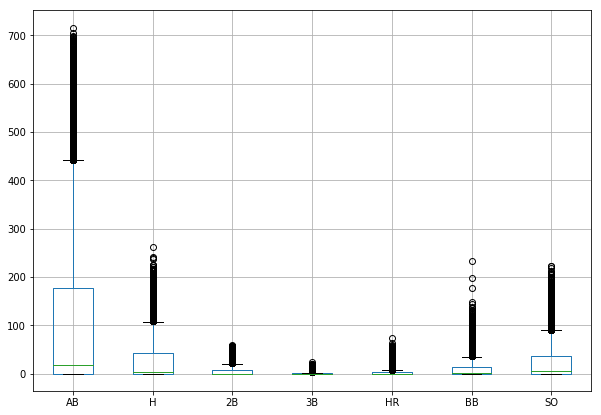

In [13]:
# DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, 
# return_type=None, **kwds)

df2k[["AB", "H", "2B", "3B", "HR", "BB", "SO"]].boxplot(figsize=(10, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192AEAC48D0>,
      dtype=object)

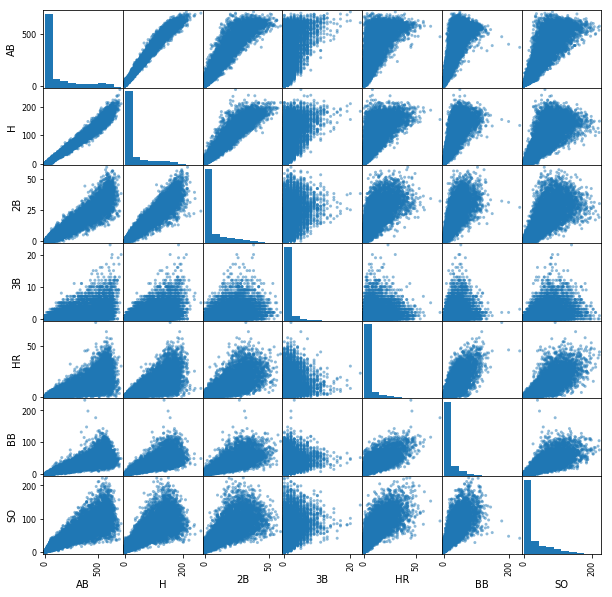

In [14]:
# scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', 
#                density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
# diagonal: pick between 'kde' and 'hist' for either Kernel Density Estimation or Histogram plot in the diagonal

scatter_matrix(df2k[["AB", "H", "2B", "3B", "HR", "BB", "SO"]], figsize=(10, 10), diagonal="hist")

It'd be helpful to see all possible correlations between columns on a single chart. 

## Derive Additional Columns

Often times, the raw data doesn't come with all columns we need. We can derive additional columns from existing columns and add them to the original dataframe. 

In [15]:
# Batting Average (BA) = H / AB

# df2k["BA"] = df2k["H"] / df2k["AB"]     

In [16]:
# Batting Average (BA) = H / AB

def divide(num, divisor):
    if divisor == 0:             # handling zero devision 
        return 0
    else:
        return num / divisor
    
df2k["BA"] = df2k.apply(lambda x: divide(x["H"], x["AB"]), axis=1)

C:\Users\kangplee\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
df2k.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA
79250,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,0.274419
79251,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,1.0,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,0.216561
79252,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.400000
79253,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,28.0,8.0,100,116.0,9.0,1.0,0.0,3.0,12.0,0.315972
79254,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [18]:
# Slugging Average (SLG) = (singles + (2 * doubles) + (3 * triples) + (4 * HR)) / AB

def get_SLG(series):
    doubles = series["2B"]
    triples = series["3B"]
    HR = series["HR"]
    singles = series["H"] - (doubles + triples + HR)
    AB = series["AB"]
    
    if AB == 0:
        return 0
    else:
        return (singles + (2 * doubles) + (3 * triples) + (4 * HR)) / AB

df2k["SLG"] = df2k.apply(lambda x: get_SLG(x), axis=1)

C:\Users\kangplee\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
df2k.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BA,SLG
79250,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,0.274419,0.395349
79251,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,1.0,14,51.0,2.0,1.0,0.0,1.0,2.0,0.216561,0.388535
79252,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.400000,0.600000
79253,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,8.0,100,116.0,9.0,1.0,0.0,3.0,12.0,0.315972,0.553819
79254,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


## Prepare Data for Modeling

In [20]:
features = ["G", "AB", "R", "BA", "SLG"]
target = "HR"

X = df2k[features]
y = df2k[target]

Data is usually denoted with a capital X, while target labels are denoted by a lowercase y. We use a capital X when the data is a two-dimensional array (or a matrix) and a lowercase y when the target is a one-dimensional array (or a vector). 

In [21]:
X.head()

,G,AB,R,BA,SLG
79250,80,215,31,0.274419,0.395349
79251,79,157,22,0.216561,0.388535
79252,35,5,1,0.400000,0.600000
79253,154,576,103,0.315972,0.553819
79254,62,1,1,0.000000,0.000000


In [22]:
y.head()

79250     3
79251     6
79252     0
79253    25
79254     0
Name: HR, dtype: int64

In [23]:
# train_test_split(*arrays, **options)
# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
X_train.shape

(17674, 5)

In [25]:
X_test.shape

(5892, 5)

In [26]:
y_train.shape

(17674,)

In [27]:
y_test.shape

(5892,)

## Modeling with k-Nearest Neigobors (k-NN)

In [28]:
# KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
#                     metric_params=None, n_jobs=1, **kwargs)

knn = KNeighborsRegressor(n_neighbors=1)

In [29]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [30]:
knn.score(X_train, y_train)

0.9999479809782474

Every score method in scikit-learn returns the $R^2$ score, which is a measure of goodness of a prediction for a regression model. A value of 1 corresponds to a perfect prediction, and a value of 0 to a constant model that just predicts the mean of the training set responses, y_train.

In [31]:
knn.score(X_test, y_test)

0.6255665628813133

In [32]:
batter = {"G": 130,
          "AB": 450,
          "R": 100,
          "BA": 0.3,
          "SLG": 0.6}

X_new = [[batter["G"], batter["AB"], batter["R"], batter["BA"], batter["SLG"]]]
knn.predict(X_new)

array([42.])

In [33]:
ks = range(1, 21)
scores_train = []
scores_test = []

for k in ks:
    print("k = {0}".format(k))
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    score_train = knn.score(X_train, y_train)
    score_test = knn.score(X_test, y_test)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    
    print("%.2f" %score_train)
    print("%.2f" %score_test)
    print()

k = 1
1.00
0.63

k = 2
0.90
0.71

k = 3
0.86
0.75

k = 4
0.85
0.77

k = 5
0.84
0.78

k = 6
0.83
0.78

k = 7
0.82
0.79

k = 8
0.82
0.79

k = 9
0.82
0.79

k = 10
0.81
0.80

k = 11
0.81
0.79

k = 12
0.81
0.80

k = 13
0.81
0.80

k = 14
0.81
0.79

k = 15
0.80
0.80

k = 16
0.80
0.80

k = 17
0.80
0.80

k = 18
0.80
0.80

k = 19
0.80
0.80

k = 20
0.80
0.80



When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors. 

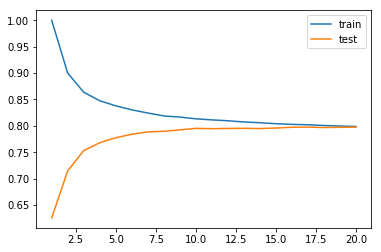

In [34]:
plt.plot(ks, scores_train, label="train")
plt.plot(ks, scores_test, label="test")
legend()

As <i>k</i> grows, the training score is gradually decreasing, while the test score is gradually increasing, but both eventually converging to some value around 0.8. 

In [35]:
knn_best = KNeighborsRegressor(n_neighbors=10)
knn_best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [36]:
knn_best.score(X_test, y_test)

0.7951451808271446

## Modeling with Linear Regression

In [37]:
# LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
lr.coef_

array([ 2.98669511e-03, -8.11528659e-03,  2.80144763e-01, -1.91175658e+01,
        1.33826489e+01])

In [40]:
for feature, coef in zip(features, lr.coef_):    # zip iterates over two lists taking one element at a time from each of the two lists.
    print(feature, "%.2f" %(coef))

G 0.00
AB -0.01
R 0.28
BA -19.12
SLG 13.38


You might interpret that BA has a negative impact on HR, while SLG has a positive impact. Unfortunately, however, it's often not entirely clear why coefficients are the way they are. This is particularly true if the dataset has highly correlated features; in theses cases, the coefficients may be hard to interpret. 

In [41]:
lr.score(X_train, y_train)

0.7896022443150147

In [42]:
lr.score(X_test, y_test)

0.8059072066811482

In [43]:
X_new = [[batter["G"], batter["AB"], batter["R"], batter["BA"], batter["SLG"]]]
lr.predict(X_new)

array([26.89687447])

## Handle Underfitting by Adding Polynomial Features

If you think your model is underfitted, which means the model is too simple, you can consider adding polynomial features, i.e., polynomial combinations of existing features.

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [45]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [46]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [47]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [48]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [49]:
X = boston.data
y = boston.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lr.score(X_train, y_train)

0.7697448370563938

In [53]:
lr.score(X_test, y_test)

0.635362078667471

Both the scores on the training set and the test set are too low, which means we are likely underfitting.

In [54]:
# PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)

poly = PolynomialFeatures(degree=2)

PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, a*b, b^2].

In [55]:
X_poly = poly.fit_transform(X)

In [56]:
X.shape, X_poly.shape

((506, 13), (506, 105))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [58]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
lr.score(X_train, y_train)

0.9391468198126123

In [60]:
lr.score(X_test, y_test)

0.5875484741502204

Now the trainig score gets very high, while the test score is still low (gets even worse). This discrepancy between those two scores is a clear sign of overfitting.

## Handle Overfitting Using Regularization

In [61]:
# Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

ridge = Ridge(alpha=1.0)

- alpha = 0     : make the model the same as simple linear regression
- increase alpha: make coefficients to move toward zero, which decreases training score but may help generalization
- alpha = ∞     : make all the coefficients zero

In [62]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
ridge.score(X_train, y_train)

0.9483698551612538

In [64]:
ridge.score(X_test, y_test)

0.6057403257457047

In [65]:
alphas = [0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
scores_train = []
scores_test = []

for alpha in alphas:
    print("alpha = {0}".format(alpha))
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    score_train = ridge.score(X_train, y_train)
    score_test = ridge.score(X_test, y_test)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    
    print("%.2f" %score_train)
    print("%.2f" %score_test)
    print()

alpha = 0
0.95
0.61

alpha = 0.01
0.95
0.57

alpha = 0.03
0.95
0.56

alpha = 0.1
0.95
0.57

alpha = 0.3
0.95
0.58

alpha = 1
0.95
0.61

alpha = 3
0.95
0.65

alpha = 10
0.94
0.72

alpha = 30
0.94
0.75

alpha = 100
0.93
0.75

alpha = 300
0.93
0.75



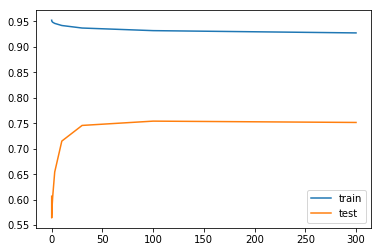

In [66]:
plt.plot(alphas, scores_train, label="train")
plt.plot(alphas, scores_test, label="test")
legend()

In [67]:
max(scores_test)

0.7542302498269802

In [68]:
np.array(scores_test).argmax()

9

In [69]:
alphas[9]

100

In [70]:
ridge_best = Ridge(alpha=100)
ridge_best.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
ridge_best.score(X_test, y_test)

0.7542302498269802